In [1]:
# Author: Jiaxin Yang
# Date: 01/16/23
# COMP664 - Homework1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

In [4]:
data = generate_data()
print(type(data))

<class 'tuple'>


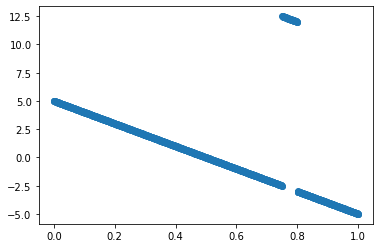

In [5]:
plt.scatter(x=data[0], y=data[1])

* Data points whose x-value is greater than 0.75 and less than 0.8 are off the straight line. 





# 2. Implement linear regression (2 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

In [6]:
# L2 Loss
def gradientDescent(x, y, theta, learn_rate, N, n_iter):
    loss_i = np.zeros(n_iter)
    for i in range(n_iter):
        m = theta[0]
        b = theta[1]
        yhat = m*x+b
        loss = np.sum((yhat-y)** 2)/(2*N)
        loss_i[i] = loss
        #print("i:%d, loss: %f" % (i, loss))

        gradient_m = np.dot(x,(yhat-y))/N
        gradient_b = np.sum((yhat-y))/N
        m = m - learn_rate*gradient_m
        b = b - learn_rate*gradient_b
        theta = [m,b]
    return theta,loss_i

In [7]:
# Hyperparameters
n_iters = [100, 500, 1000]
learn_rates = [0.001, 0.01, 0.1]
N = len(data[0])

In [8]:
# Tune hyperparameters
for n_iter in n_iters:
  for learn_rate in learn_rates:
    theta = np.zeros(2)
    #print("######################")
    #print("n_iter:" + str(n_iter) + " learn_rate:" + str(learn_rate))
    gradientDescent(data[0], data[1], theta, learn_rate, N, n_iter)

* From the above results, I choose the learning rate to be 0.1 and number of iterations to be 500.

In [9]:
theta = np.zeros(2)
theta,loss = gradientDescent(data[0], data[1], theta, 0.1, N, 500)

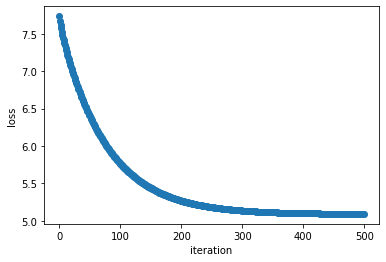

In [10]:
# Plot the loss over interations
epoch = range(len(loss))
plt.plot(epoch,loss,'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


In [11]:
# w and b
print(theta)

[-7.243665537597473, 4.361826285650684]


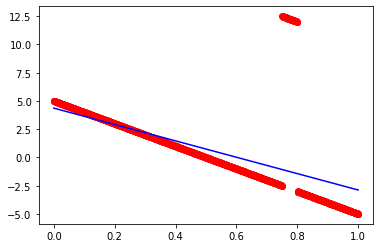

In [12]:
# Plot the model 
plt.plot(data[0],data[1],'or')
plt.plot(data[0],theta[0]*data[0]+theta[1],'b')
plt.show()

* We can find that the values of w (-7.24) and b (4.36) found by my model after training are not very close to the truth values (w = -10, b = 5) because of the outliers (0.75 < x < 0.8). The plot can indicate the same problem as well. The two lines are not overlap very much.

# 4. "Robust" linear regression (0.5 points)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

In [13]:
# L1 Loss
def gradientDescent(x, y, theta, learn_rate, N, n_iter):
    loss_i = np.zeros(n_iter)
    for i in range(n_iter):
        m = theta[0]
        b = theta[1]
        yhat = m*x+b
        loss = np.sum(abs(yhat-y)) / N
        loss_i[i] = loss
        # print("i:%d, loss: %f" % (i, loss))

        gradient_m = np.sum(((yhat - y) / abs((yhat - y)) * x)) / N
        gradient_b = np.sum(((yhat - y) / abs((yhat - y)))) / N

        m = m - learn_rate*gradient_m
        b = b - learn_rate*gradient_b
        theta = [m,b]

    return theta,loss_i

In [14]:
theta = np.zeros(2)
theta,loss = gradientDescent(data[0], data[1], theta, 0.01, N, 10000)

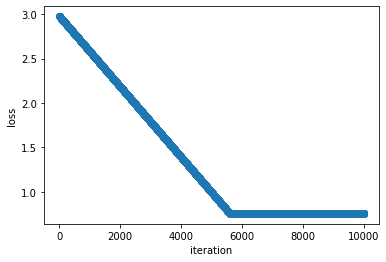

In [15]:
# Plot the loss
epoch = range(len(loss))
plt.plot(epoch,loss,'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

* Compared to the squared-error linear regression, we can find that L1 loss converges slow and reach stable at some point. The L2 loss converges much faster as L2 loss has a larger gradient when far away from the zero gradients.

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

In [16]:
# w and b
print(theta)

[-10.000002902903926, 5.001339999999163]


* We can find that the new values of w and b found by "Robust" model (L1 Loss) are much closer to the true values now. 

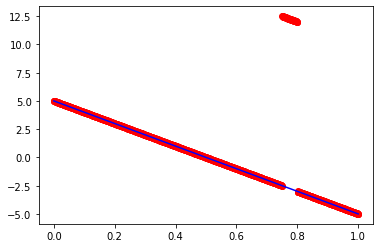

In [17]:
# Plot the model
plt.plot(data[0],data[1],'or')
plt.plot(data[0],theta[0]*data[0]+theta[1],'b')
plt.show()

* The above plot can also show that the two lines roughly overlap with each other even with the outliers. From the formulas, we can get to know that the L1 Loss function minimizes the absolute differences between the prediction values and the actual values. The L2 Loss function minimizes the squared differences between the prediction and actual values. Therefore, the L1 loss function is more robust and is generally unaffected by outliers. On the other hand, the L2 loss function is highly sensitive to outliers. The L2 loss function will try to adjust the model according to outliers at the expense of other data points.